### Conversion of VOC xml annotation style to YOLOv2.0 list
Functions and class definitions.

In [2]:
import os
import sys
import numpy as np
import os
from numpy.random import RandomState
def convert_to_yolo_format(xmin,xmax,ymin,ymax,im_height,im_width):
    hei = ymax-ymin
    wid = xmax-xmin
    xcen = (xmin+(wid//2))/im_width
    ycen = (ymin+(hei//2))/im_height
    widc = wid/im_width
    heic = hei/im_height
    return xcen, ycen, widc, heic

class_look_up = {}
class_look_up['cell - neuroblastoma phalloidin'] = 0
class_look_up['cell - neuroblastoma phalloidin dapi'] = 1
class_look_up['cell - erythroblast dapi glycophorinA FOXO3'] = 2
class_look_up['cell - erythroblast dapi glycophorinA'] = 3
class_look_up['cell - erythroblast dapi'] = 4
class_look_up['cell - eukaryote dapi'] = 5
class_look_up['cell - fibroblast nucleopore'] = 6
class_look_up['cell - hela peroxisome'] = 7
class_look_up['cell - hela peroxisome all']= 8
class_look_up['cell - c127 dapi']= 9


path = "/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/"
datasets = []
datasets_size =[]
datasets_class = []
datasets.append("neuroblastoma_phal_class/2018/")
datasets_size.append([180,180])
datasets_class.append(['cell - neuroblastoma phalloidin'])
datasets.append("neuroblastoma_phal_class/2018/")
datasets_size.append([25,180])
datasets_class.append(['cell - neuroblastoma phalloidin'])
datasets.append("neuroblastoma_phal_class/2018/")
datasets_size.append([50,180])
datasets_class.append(['cell - neuroblastoma phalloidin'])
datasets.append("neuroblastoma_phal_class/2018/")
datasets_size.append([75,180])
datasets_class.append(['cell - neuroblastoma phalloidin'])
datasets.append("neuroblastoma_phal_class/2018/")
datasets_size.append([100,180])
datasets_class.append(['cell - neuroblastoma phalloidin'])
datasets.append("neuroblastoma_phal_class/2018/")
datasets_size.append([125,180])
datasets_class.append(['cell - neuroblastoma phalloidin'])
datasets.append("neuroblastoma_phal_class/2018/")
datasets_size.append([150,180])
datasets_class.append(['cell - neuroblastoma phalloidin'])
datasets.append("neuroblastoma_phal_dapi_class/2018/")
datasets_size.append([180,180])
datasets_class.append(['cell - neuroblastoma phalloidin dapi'])


datasets.append("erythroblast_dapi_class/2018/")
datasets_size.append([80,80])
datasets_class.append(['cell - erythroblast dapi'])

datasets.append("erythroblast_dapi_glycophorinA_class/2018/")
datasets_size.append([80,80])
datasets_class.append(['cell - erythroblast dapi glycophorinA'])

datasets.append("c127_dapi_class/2018/")
datasets_size.append([30,30])
datasets_class.append(['cell - c127 dapi'])

datasets.append("eukaryote_dapi_class/2018/")
datasets_size.append([40,40])
datasets_class.append(['cell - eukaryote dapi'])

datasets.append("fibroblast_nucleopore_class/2018/")
datasets_size.append([26,20])
datasets_class.append(['cell - fibroblast nucleopore'])

datasets.append("hela_peroxisome_class/2018/")
datasets_size.append([55,55])
datasets_class.append(['cell - hela peroxisome'])

datasets.append("hela_peroxisome_all_class/2018/")
datasets_size.append([55,55])
datasets_class.append(['cell - hela peroxisome all'])



In [9]:

for dataset in datasets:
    print(dataset)
    for file_nm in os.listdir(path+dataset+'Annotations/'):
        if file_nm.endswith(".xml"):       
            data =  open(path+dataset+'Annotations/'+file_nm,"r")
            out_str = ""
            while 1:
                line = data.readline()
                if not line:
                    break
                if line.find("<name>") >-1:
                    im_class =  line.split("<name>")[1].split("</name>")[0]
                if line.find("<width>") >-1:
                    im_width =  float(line.split("<width>")[1].split("</width>")[0])
                if line.find("height") >-1:
                    im_height =  float(line.split("<height>")[1].split("</height>")[0])
                if line.find("<bndbox>") > -1:
                    xmin_str = data.readline()
                    xmin = float(xmin_str.split("<xmin>")[1].split("</xmin>")[0])
                    ymin_str = data.readline()
                    ymin = float(ymin_str.split("<ymin>")[1].split("</ymin>")[0])
                    xmax_str = data.readline()
                    xmax = float(xmax_str.split("<xmax>")[1].split("</xmax>")[0])
                    ymax_str = data.readline()
                    ymax = float(ymax_str.split("<ymax>")[1].split("</ymax>")[0])


                    xcen, ycen, widc, heic = convert_to_yolo_format(xmin,xmax,ymin,ymax,im_height,im_width)
                    out_str +=  str(0)+" "+str(xcen)+" "+str(ycen)+" "+str(widc)+" "+str(heic)+"\n"

            f = open(path+dataset+'labels/'+file_nm[:-4]+'.txt',"w")
            f.write(out_str)
            #print(out_str)

            f.close()
            data.close()

neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_dapi_class/2018/
erythroblast_dapi_class/2018/
erythroblast_dapi_glycophorinA_class/2018/
c127_dapi_class/2018/
eukaryote_dapi_class/2018/
fibroblast_nucleopore_class/2018/
hela_peroxisome_class/2018/
hela_peroxisome_all_class/2018/


### This is where the training and test image lists are converted into YOLO format
Yolo includes paths with the images not just the numbers.

In [24]:
#Generates lists for the PASCAL dataset.
def generate_random_list(number_to_include, directory):
    store_lines = []
    for file in os.listdir(directory+"/Annotations"):
        if file.endswith(".xml"):
            store_lines.append(str(file[:-4]))
    
    np.random.seed(seed=500)
    if np.sum(number_to_include) > store_lines.__len__():
        print(np.sum(number_to_include), store_lines.__len__())
        print('error the number to include exceeds total files present:' )
        print(directory)
        return
   

    indices_to_use = np.random.choice(np.arange(0,store_lines.__len__()), size=store_lines.__len__(), replace=False)
    training_list = np.sort(indices_to_use[:number_to_include[0]])
    test_list = np.sort(indices_to_use[-number_to_include[1]:])
    

    outF = open(directory+"ImageSets/Main/"+"train_n"+str(int(number_to_include[0]))+".txt", "w")
    store_lines = np.array(store_lines)
    textList = list(map(lambda x: x, store_lines[training_list]))
    outF.writelines("%s\n" % l for l in textList)
    outF.close()

    outF = open(directory+"ImageSets/Main/"+"test_n"+str(int(number_to_include[1]))+".txt", "w")
    textList = list(map(lambda x: x, store_lines[test_list]))
    outF.writelines("%s\n" % l for l in textList)
    outF.close()
    print("train_n"+str(int(number_to_include[0]))+".txt")
    print("test_n"+str(int(number_to_include[1]))+".txt")
    print("written to directory:", directory+"ImageSets/Main/")

for dataset,dataset_size in zip(datasets,datasets_size):
    generate_random_list(dataset_size, path+dataset)
   

train_n180.txt
test_n180.txt
('written to directory:', '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/ImageSets/Main/')
train_n25.txt
test_n180.txt
('written to directory:', '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/ImageSets/Main/')
train_n50.txt
test_n180.txt
('written to directory:', '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/ImageSets/Main/')
train_n75.txt
test_n180.txt
('written to directory:', '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/ImageSets/Main/')
train_n100.txt
test_n180.txt
('written to directory:', '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/ImageSets/M

# How many cells there are in an image
Calculates how many cells there are in an image on average.

In [14]:
for dataset in datasets:
    print(dataset)
    cell_num = []
    for file_nm in os.listdir(path+dataset+'Labels/'):

        f = open(path+dataset+'Labels/'+file_nm)
        lines = f.readlines()
        #print('file_nm',file_nm,'num of lines',lines.__len__())
        cell_num.append(lines.__len__())
        f.close()
    print np.average(cell_num)

neuroblastoma_phal_class/2018/
11.7277777778
neuroblastoma_phal_class/2018/
11.7277777778
neuroblastoma_phal_class/2018/
11.7277777778
neuroblastoma_phal_class/2018/
11.7277777778
neuroblastoma_phal_class/2018/
11.7277777778
neuroblastoma_phal_class/2018/
11.7277777778
neuroblastoma_phal_class/2018/
11.7277777778
neuroblastoma_phal_dapi_class/2018/
11.7277777778
erythroblast_dapi_class/2018/
4.52662721893
erythroblast_dapi_glycophorinA_class/2018/
4.52662721893
c127_dapi_class/2018/
7.07692307692
eukaryote_dapi_class/2018/
8.9375
fibroblast_nucleopore_class/2018/
4.76086956522
hela_peroxisome_class/2018/
3.85454545455
hela_peroxisome_all_class/2018/
7.92727272727


In [11]:
print lines

0 0.37969924812 0.757518796992 0.184210526316 0.246240601504



### Generate global list
Yolo includes paths with the images not just the numbers.

In [25]:
#Generates Global lists.
def generate_global_list(number_to_include, directory,outF1,outF2):
    store_lines = []
    for file in os.listdir(directory+"/Annotations"):
        if file.endswith(".xml"):
            store_lines.append(str(file[:-4]))
    
    np.random.seed(seed=500)
    if np.sum(number_to_include) > store_lines.__len__():
        print(np.sum(number_to_include), store_lines.__len__())
        print('error the number to include exceeds total files present:' )
        print(directory)
        return
   

    indices_to_use = np.random.choice(np.arange(0,store_lines.__len__()), size=store_lines.__len__(), replace=False)
    training_list = np.sort(indices_to_use[:number_to_include[0]])
    test_list = np.sort(indices_to_use[-number_to_include[1]:])
    
    store_lines = np.array(store_lines)
    textList = list(map(lambda x: x, store_lines[training_list]))
    outF1.writelines("%s\n" % l for l in textList)
    
    textList = list(map(lambda x: x, store_lines[test_list]))
    outF2.writelines("%s\n" % l for l in textList)
    
    print("train_n"+str(int(number_to_include[0]))+".txt")
    print("test_n"+str(int(number_to_include[1]))+".txt")

global_path = "global/2018/"
indices_to_use = [6,8,10,11,12,14]
glb_datasets = []
glb_datasets_size = []
glb_datasets_class = []
for index_to_use in indices_to_use:
    glb_datasets.append(datasets[index_to_use]) 
    glb_datasets_size.append(datasets_size[index_to_use])
    glb_datasets_class.append(datasets_class[index_to_use])

outF1 = open(path+global_path+"ImageSets/Main/"+"train_n.txt", "w")
outF2 = open(path+global_path+"ImageSets/Main/"+"test_n.txt", "w")
for dataset,dataset_size in zip(glb_datasets,glb_datasets_size):
    
    generate_global_list(dataset_size, path+dataset, outF1, outF2)
outF1.close()
outF2.close()

path_on_server = '/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/'

f1 =  open(path+global_path+'train_dn_n.txt',"w")
f2 =  open(path+global_path+'test_dn_n.txt',"w")
for dataset,dataset_size in zip(glb_datasets,glb_datasets_size):
        print(dataset)
        path_dir = path+dataset
        path_in = path_dir+"ImageSets/Main/"    
        data1 = open(path_in+"train_n"+str(int(dataset_size[0]))+".txt","r")

        
        while 1:
            line = data1.readline()
            if not line:
                break
            f1.write(path_on_server+dataset+"JPEGImages/"+line[:-1]+'.jpg\n')
            print(path_on_server+dataset+"JPEGImages/"+line[:-1]+'.jpg')
        
        path_dir = path+dataset  
        path_in = path_dir+"ImageSets/Main/" 
        data2 = open(path_in+"test_n"+str(int(dataset_size[1]))+".txt","r")
        
        while 1:
            line = data2.readline()
            if not line:
                break
            f2.write(path_on_server+dataset+"JPEGImages/"+line[:-1]+'.jpg\n')
        
f1.close()
data1.close()
f2.close()
data2.close()
backup_path = "/scratch/dwaithe/models/darknet/global/"
f = open(path+global_path+'obj_global_class.data',"w")
f1 = open(path+global_path+'obj_global_class.names',"w")
c = 0
for dataset,dataset_size,dataset_class in zip(glb_datasets,glb_datasets_size,glb_datasets_class):
    path_dir = path+dataset
    
    c+=1
    
    
    
    f1.write(dataset_class[0]+"\n")
f.write("classes = "+str(c)+"\n")
f.write("train = "+path_on_server+global_path+'train_dn_n.txt'+"\n")
f.write("valid = "+path_on_server+global_path+'test_dn_n.txt'+"\n")
f.write("names = "+path_on_server+global_path+'obj_global_class.names'+"\n")
f.write("backup = "+backup_path+global_path)
    
f.close()


train_n150.txt
test_n180.txt
train_n80.txt
test_n80.txt
train_n30.txt
test_n30.txt
train_n40.txt
test_n40.txt
train_n26.txt
test_n20.txt
train_n55.txt
test_n55.txt
neuroblastoma_phal_class/2018/
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/JPEGImages/110082.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/JPEGImages/110083.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/JPEGImages/110087.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/JPEGImages/110088.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/JPEGImages/110092.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/JPEGImages/110098.jpg
/home/molimm2/dwaithe/ker

In [21]:
#This is the colour global dataset.

global_path = "global/2018/"
indices_to_use = [7,9]
glb_datasets = []
glb_datasets_size = []
glb_datasets_class = []
for index_to_use in indices_to_use:
    glb_datasets.append(datasets[index_to_use]) 
    glb_datasets_size.append(datasets_size[index_to_use])
    glb_datasets_class.append(datasets_class[index_to_use])

outF1 = open(path+global_path+"ImageSets/Main/"+"train_n.txt", "w")
outF2 = open(path+global_path+"ImageSets/Main/"+"test_n.txt", "w")
for dataset,dataset_size in zip(glb_datasets,glb_datasets_size):
    
    generate_global_list(dataset_size, path+dataset, outF1, outF2)
outF1.close()
outF2.close()

path_on_server = '/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/'

f1 =  open(path+global_path+'train_inc_colour_dn_n.txt',"w")
f2 =  open(path+global_path+'test_inc_colour_dn_n.txt',"w")
for dataset,dataset_size in zip(glb_datasets,glb_datasets_size):
        print(dataset)
        path_dir = path+dataset
        path_in = path_dir+"ImageSets/Main/"    
        data1 = open(path_in+"train_n"+str(int(dataset_size[0]))+".txt","r")

        
        while 1:
            line = data1.readline()
            if not line:
                break
            f1.write(path_on_server+dataset+"JPEGImages/"+line[:-1]+'.jpg\n')
            print(path_on_server+dataset+"JPEGImages/"+line[:-1]+'.jpg')
        
        path_dir = path+dataset  
        path_in = path_dir+"ImageSets/Main/" 
        data2 = open(path_in+"test_n"+str(int(dataset_size[1]))+".txt","r")
        
        while 1:
            line = data2.readline()
            if not line:
                break
            f2.write(path_on_server+dataset+"JPEGImages/"+line[:-1]+'.jpg\n')
        
f1.close()
data1.close()
f2.close()
data2.close()
backup_path = "/scratch/dwaithe/models/darknet/global_inc_col/"
f = open(path+global_path+'obj_global_inc_colour_class.data',"w")
f1 = open(path+global_path+'obj_global_inc_colour_class.names',"w")
c = 0
for dataset,dataset_size,dataset_class in zip(glb_datasets,glb_datasets_size,glb_datasets_class):
    path_dir = path+dataset
    
    c+=1
    
    
    
    f1.write(dataset_class[0]+"\n")
f.write("classes = "+str(c)+"\n")
f.write("train = "+path_on_server+global_path+'train_inc_colour_dn_n.txt'+"\n")
f.write("valid = "+path_on_server+global_path+'test_inc_colour_dn_n.txt'+"\n")
f.write("names = "+path_on_server+global_path+'obj_global_inc_colour_class.names'+"\n")
f.write("backup = "+backup_path+global_path)
    
f.close()
f1.close()

train_n180.txt
test_n180.txt
train_n80.txt
test_n80.txt
neuroblastoma_phal_dapi_class/2018/
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_dapi_class/2018/JPEGImages/110082.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_dapi_class/2018/JPEGImages/110083.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_dapi_class/2018/JPEGImages/110087.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_dapi_class/2018/JPEGImages/110088.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_dapi_class/2018/JPEGImages/110089.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_dapi_class/2018/JPEGImages/110092.jpg
/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_d

### Converts the test and train files lists into YoloV2 format.

In [26]:
path_on_server = '/home/molimm2/dwaithe/keras_experiments/Faster-RCNN-TensorFlow-Python3.5/data/'

for dataset,dataset_size in zip(datasets,datasets_size):
  
        path_dir = path+dataset
        f = open(path_dir+'train_dn_n'+str(dataset_size[0])+'.txt',"w")
        path_in = path_dir+"ImageSets/Main/"
        data =  open(path_in+'train_n'+str(dataset_size[0])+'.txt',"r")
        out_str = ""

        while 1:
            line = data.readline()
            if not line:
                break
            f.write(path_on_server+dataset+"JPEGImages/"+line[:-1]+'.jpg\n')
        f.close()
        data.close()
        
        path_dir = path+dataset
        f = open(path_dir+'test_dn_n'+str(dataset_size[1])+'.txt',"w")
        path_in = path_dir+"ImageSets/Main/"
        data =  open(path_in+'test_n'+str(dataset_size[1])+'.txt',"r")
        out_str = ""

        while 1:
            line = data.readline()
            if not line:
                break
            f.write(path_on_server+dataset+"JPEGImages/"+line[:-1]+'.jpg\n')
        f.close()
        data.close()

### Updating the .name and .obj files For single classes.

In [27]:
backup_path = "/scratch/dwaithe/models/darknet/"

for dataset,dataset_size,dataset_class in zip(datasets,datasets_size,datasets_class):
    path_dir = path+dataset
    print dataset
    f = open(path_dir+'obj_'+str(dataset.split("/")[0])+str(dataset_size[0])+'.data',"w")
    f.write("classes = 1\n")
    f.write("train = "+path_on_server+dataset+'train_dn_n'+str(dataset_size[0])+'.txt'+"\n")
    f.write("valid = "+path_on_server+dataset+'test_dn_n'+str(dataset_size[1])+'.txt'+"\n")
    f.write("names = "+path_on_server+dataset+'obj_'+str(dataset.split("/")[0])+'.names'+"\n")
    f.write("backup = "+backup_path+str(dataset.split("/")[0])+str(dataset_size[0])+"\n")
    f.close()
    
    f = open(path_dir+'obj_'+str(dataset.split("/")[0])+'.names',"w")
    f.write(dataset_class[0]+"\n")
    f.close()
    
    

neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_class/2018/
neuroblastoma_phal_dapi_class/2018/
erythroblast_dapi_class/2018/
erythroblast_dapi_glycophorinA_class/2018/
c127_dapi_class/2018/
eukaryote_dapi_class/2018/
fibroblast_nucleopore_class/2018/
hela_peroxisome_class/2018/
hela_peroxisome_all_class/2018/


### This imports images and labels from YOLO and converts them into plot coordinates
Just to test that my label files created for YOLO match those from YOLO.

Populating the interactive namespace from numpy and matplotlib
(532, 532)
0 0.552631578947 0.223684210526 0.135338345865 0.135338345865

0 0.742481203008 0.0338345864662 0.142857142857 0.0639097744361

0 0.627819548872 0.441729323308 0.131578947368 0.133458646617

0 0.306390977444 0.834586466165 0.193609022556 0.206766917293

0 0.466165413534 0.883458646617 0.12969924812 0.125939849624

0 0.885338345865 0.437969924812 0.12969924812 0.137218045113

0 0.932330827068 0.646616541353 0.122180451128 0.125939849624


(293.999999999804, 118.999999999832, 72.00000000018, 72.00000000018)
(395.000000000256, 18.0000000000184, 75.999999999924, 34.0000000000052)
(333.999999999904, 234.99999999985602, 69.999999999776, 71.000000000244)
(163.00000000020802, 443.99999999978, 102.999999999792, 109.99999999987601)
(248.000000000088, 470.00000000024403, 68.99999999984, 66.99999999996801)
(471.00000000018, 232.999999999984, 68.99999999984, 73.000000000116)
(496.000000000176, 343.999999999796, 65.00000000009

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


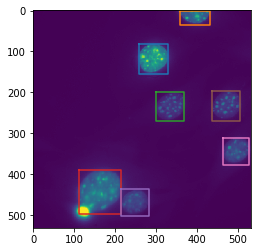

In [28]:
%pylab inline
import pylab as plt
path_in = '/Users/dwaithe/Documents/collaborators/WaitheD/darknet/data/NFPA dataset'
#f = open(path_in+'/pos-21.txt',"r")
#img = plt.imread(path_in+"/pos-21.jpg")
#height, width, channels = img.shape

path_in = '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/fibroblast_nucleopore_class/2018/'
f = open(path_in+'labels/010055.txt',"r")
img = plt.imread(path_in+"JPEGImages/010055.jpg")

path_in = '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/neuroblastoma_phal_class/2018/'
f = open(path_in+'labels/110082.txt',"r")
img = plt.imread(path_in+"JPEGImages/110082.jpg")

path_in = '/Users/dwaithe/Documents/collaborators/WaitheD/micro_vision/Faster-RCNN-TensorFlow-Python3.5/data/c127_dapi_class/2018/'
f = open(path_in+'labels/108633.txt',"r")
img = plt.imread(path_in+"JPEGImages/108633.jpg")
height, width = img.shape
print(height,width)

lines =[]
while 1:
    line = f.readline()
    print(line)
    if not line:
        break
    lines.append(line)
figure()
imshow(img) 
for line in lines:
    ele = line.split(" ")
    xmin = float(ele[1])*width
    ymin = float(ele[2])*height
    wid = float(ele[3])*width
    hei = float(ele[4].split("\r")[0])*height
    print(xmin,ymin,wid,hei)
    
    plta = [xmin-(wid//2),xmin-(wid//2),xmin+(wid//2),xmin+(wid//2),xmin-(wid//2)]
    pltb = [ymin-(hei//2),ymin+(hei//2),ymin+(hei//2),ymin-(hei//2),ymin-(hei//2)]
    
    plot(plta,pltb,'-')
    
 
f.close()


In [6]:
ele

['0\t0.332706766917\t0.637218045113\t0.43045112782\t0.78007518797\n']

### Validates the VOC label format

In [17]:
for dataset in datasets:
    count_x_zero = 0
    count_y_zero = 0
    count_x_ones = 0
    count_y_ones = 0
    
    count_wid = 0
    count_hei = 0
    count_wid_mone = 0
    count_hei_mone = 0
    count_wid_great = 0
    count_hei_great = 0
    
    
    count_files = 0
    count_regions =0
    for file_nm in os.listdir(path+dataset+'Annotations/'):
        if file_nm.endswith(".xml"): 
            count_files +=1
            data =  open(path+dataset+'Annotations/'+file_nm,"r")
            out_str = ""
            while 1:
                line = data.readline()
                if not line:
                    break
                #print line
                if line.find("<name>") >-1:
                    im_class =  line.split("<name>")[1].split("</name>")[0]
                if line.find("<width>") >-1:
                    im_width =  float(line.split("<width>")[1].split("</width>")[0])
                if line.find("height") >-1:
                    im_height =  float(line.split("<height>")[1].split("</height>")[0])
                if line.find("<bndbox>") > -1:
                    count_regions +=1
                    xmin_str = data.readline()
                    xmin = float(xmin_str.split("<xmin>")[1].split("</xmin>")[0])
                    ymin_str = data.readline()
                    ymin = float(ymin_str.split("<ymin>")[1].split("</ymin>")[0])
                    xmax_str = data.readline()
                    xmax = float(xmax_str.split("<xmax>")[1].split("</xmax>")[0])
                    ymax_str = data.readline()
                    ymax = float(ymax_str.split("<ymax>")[1].split("</ymax>")[0])
                    #print(xmin,xmax,ymin,ymax)
                    if xmin == 0:
                        count_x_zero +=1
                    if ymin == 0:
                        count_y_zero +=1
                    if xmin == 1:
                        count_x_ones +=1
                    if ymin == 1:
                        count_y_ones +=1
                    if xmax == im_width:
                        count_wid +=1
                    if ymax == im_height:
                        count_hei +=1
                    if xmax == im_width-1:
                        count_wid_mone +=1
                    if ymax == im_height-1:
                        count_hei_mone +=1
                    if xmax > im_width:
                        count_wid_great +=1
                    if ymax >im_height:
                        count_hei_great +=1
            data.close()
    out = [count_files,count_regions,count_x_zero,count_y_zero,count_x_ones, count_y_ones,count_wid,count_hei]
    out.extend([count_wid_mone,count_hei_mone,count_wid_great,count_hei_great])
    print(dataset.split("/")[0],out)

('neuroblastoma_phal_class', [360, 4222, 0, 0, 668, 657, 30, 38, 668, 644, 0, 0])
('neuroblastoma_phal_class', [360, 4222, 0, 0, 668, 657, 30, 38, 668, 644, 0, 0])
('neuroblastoma_phal_class', [360, 4222, 0, 0, 668, 657, 30, 38, 668, 644, 0, 0])
('neuroblastoma_phal_class', [360, 4222, 0, 0, 668, 657, 30, 38, 668, 644, 0, 0])
('neuroblastoma_phal_class', [360, 4222, 0, 0, 668, 657, 30, 38, 668, 644, 0, 0])
('neuroblastoma_phal_class', [360, 4222, 0, 0, 668, 657, 30, 38, 668, 644, 0, 0])
('neuroblastoma_phal_class', [360, 4222, 0, 0, 668, 657, 30, 38, 668, 644, 0, 0])
('neuroblastoma_phal_dapi_class', [360, 4222, 0, 0, 668, 657, 30, 38, 668, 644, 0, 0])
('erythroblast_dapi_class', [169, 765, 0, 0, 16, 22, 0, 0, 22, 11, 0, 0])
('erythroblast_dapi_glycophorinA_class', [169, 765, 0, 0, 16, 22, 0, 0, 22, 11, 0, 0])
('c127_dapi_class', [65, 460, 0, 0, 35, 36, 34, 18, 2, 1, 0, 0])
('eukaryote_dapi_class', [80, 715, 0, 0, 46, 48, 0, 0, 54, 54, 0, 0])
('fibroblast_nucleopore_class', [46, 219, 0